### importing the required libraries

In [1]:
!pip install pandas
!pip install seaborn
!pip install contractions
!pip install nltk
!pip install unidecode
!pip install scikit-learn
!pip install numpy

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style(style="whitegrid")
import matplotlib.pyplot as plt
import nltk
# import ssl
# try:
#    _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#    pass
# else:
#    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import re
import contractions
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import numpy as np






[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/onkars/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/onkars/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### creating a dataframe from imported dataset

In [3]:
filePath = r"../dataset/ESWA20_manualclassification.csv"

In [4]:
df = pd.read_csv(filePath, encoding='ISO-8859-1')

df

,Commit Message,Category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


In [5]:
df['commit_message'] = df['Commit Message']
del df['Commit Message']

df['category'] = df['Category']
del df['Category']

df

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


### understanding the dataset

In [6]:
df.shape

(1740, 2)

There are 1740 records and 2 features in the dataset (including the target feature)

In [7]:
df.dtypes

commit_message    object
category          object
dtype: object

both the features have object as a data type

In [8]:
df.head()

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external


In [9]:
df.tail()

,commit_message,category
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell
1739, changed render routine for text fields  added tabbing abilities to CustomScreen  various modifications on CustomScreen to match the new TextField requirements  changed size of PacketSky,internal


In [10]:
df.sample(5)

,commit_message,category
738,"Implemented gathering runtime statistics and publishing them via jmx, this was feature #43 (Calculate statistics for serialization time / backup time / load time / skips etc).\n",functional
1300,"Use SpellCheckedMetadata only when necessary, i.e. only when collecting\nmetadata from unreliable sources such as HTTP headers.\n\n* Metadata: fix a bug where SpellCheckedMetadata would try to normalize\n metadata names during (de)serialization.\n\n* Content: should use regular Metadata by default, and when de-serializing.\n\n* fix HTTP protocol plugins to use SpellCheckedMetadata, where it's really\n necessary.\n\n\n\ngit-svn-id: https://svn.apache.org/repos/asf/lucene/nutch/trunk@480207 13f79535-47bb-0310-9956-ffa450edef68\n",bugfix
372,CAMEL-4428 Introduce NamedNode as Abstraction of OptionalIdentifiedDefinition. This avoids some references from api to model,internal
283,Allow to configure retry condition\n\nThe `@Retry` annotation can now be used to configure an optional\n`condition` closure that is evaluated when a feature fails to determine\nwhether it should be retried.\n\nResolves #872.\n,functional
1173,Rewrite all the possible Blocks for the If While For ForEach and Switch statements. This rewriting handles modifications in the Block type from curly to non-curly ('Alternative') forms of blocks.,code smell


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   commit_message  1740 non-null   object
 1   category        1740 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


### EDA

In [12]:
df.describe(include='object')

,commit_message,category
count,1740,1740
unique,1716,5
top,Removed duplicate code and added outlines for how to add version to the start log entry.,functional
freq,3,348


In [13]:
df.category.unique()

array(['functional', 'bugfix', 'code smell', 'external', 'internal'],
      dtype=object)

In [14]:
print("The sum of duplicate records is ")
df.duplicated().sum()


The sum of duplicate records is 


19

In [15]:
# removing the duplicates

df = df.drop_duplicates()

df.count()

commit_message    1721
category          1721
dtype: int64

In [16]:
# checking for null values

df.isnull().sum()

commit_message    0
category          0
dtype: int64

In [17]:
# checking for NaN values

df.isna().sum()

commit_message    0
category          0
dtype: int64

In [18]:
# checking for records with only spaces in the commit_message columns

only_spaces_count = df['commit_message'].apply(lambda x: x.isspace() if pd.notnull(x) else False).sum()

only_spaces_count


0

In [19]:
df.count(), df.nunique()

(commit_message    1721
 category          1721
 dtype: int64,
 commit_message    1716
 category             5
 dtype: int64)

### found out the data descrepancy

the total records are 1721 and the unique records are 1716 and 5 in columns commit_messages and categories, respectively

I have done the root-cause analysis of this issue, to determine whether to keep the record or remove it completely

In [20]:

duplicate_records = df[df['commit_message'].duplicated(keep=False)]

duplicate_records

# 508, 796, 862, 1242, 1346

,commit_message,category
508,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,internal
509,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,external
796,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,internal
797,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,external
862,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,internal
863,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,external
1241,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,internal
1242,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,code smell
1346,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",internal
1347,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",external


**508, 509**: maybe new functionality, thus **internal** seems correct as it does not specifically mention fixing bugs or issues.

**796, 797**: seems like internal enhancements and updates to existing systems, so **internal** 

**862, 863**: change in functionality to enhance performance and security, so **internal**

**1241, 1242**: This is clearly a code maintenance task, thats why the **code smell** category

**1346, 1347**: If "external" refers to changes that affect end-users or outside systems, and "internal" refers to changes within the codebase that do not affect external interfaces, then it's likely that both should be categorized as **internal**.

In [21]:
df = df.drop(labels=[509, 797, 863, 1241, 1347], axis=0)

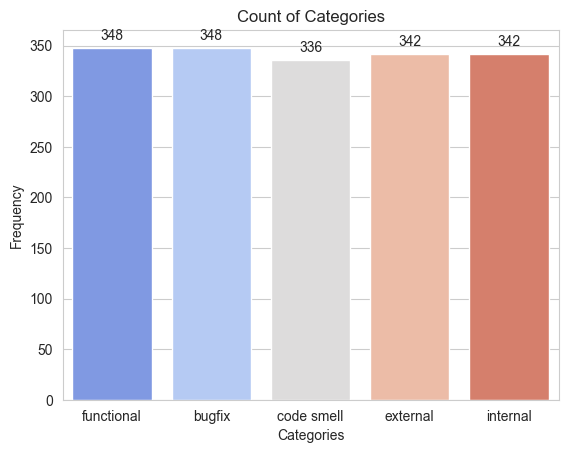

In [22]:
ax = sns.countplot(x=df.category, data=df, palette='coolwarm', hue=df.category, legend=False)

plt.title('Count of Categories')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# annotate each bar with the number of occurences
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # The number to annotate
        (p.get_x() + p.get_width() / 2., p.get_height()), # Position
        ha = 'center', # center horizontally
        va = 'center', # center vertically
        xytext = (0, 9), # Text offset
        textcoords = 'offset points')

plt.show()

### Text Pre-processing

In [23]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Normalize accents and special characters
    text = unidecode.unidecode(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove single-character tokens (mostly punctuation)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Trim leading and trailing whitespace
    text = text.strip()
    
    return text



In [24]:
stop_words = set(stopwords.words('english'))

custom_stop_words = ['git', 'svn', 'refactor', 'gitsvnid', 'signedoffby', 'reviewedon', 'testedby', 'us', 'id', 'changeid', 'lot', 'small', 'thing', 'way'] # Add more custom words here --- lots
stop_words.update(custom_stop_words)

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


In [25]:
df['commit_message_clean'] = df['commit_message'].apply(clean_text)
df['commit_message_clean'] = df['commit_message_clean'].apply(remove_stopwords)


In [26]:
df['tokens'] = df['commit_message_clean'].apply(word_tokenize)
df['pos_tags'] = df['tokens'].apply(pos_tag)

In [27]:
lemmatizer = WordNetLemmatizer()

# Function to map NLTK position tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

# Lemmatize a sentence with the appropriate POS tag
def lemmatize_with_pos(sentence):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in sentence]

# Apply the lemmatization function to the pos tags
df['lemmatized'] = df['pos_tags'].apply(lemmatize_with_pos)


In [28]:
df['lemmatized_text'] = df['lemmatized'].apply(' '.join)


In [29]:
df = df[['lemmatized_text', 'category']]

df

,lemmatized_text,category
0,nio read write complete caller would compatible old interface functionality connection instance object receive data message multiple opread event,functional
1,temporary fix nonshared jarray object add generic unittests check jcclucenesolrmontysolr functionality write unittest newseman complete processing python side remain call java decide proper behaviour case token addedgrouped,bugfix
2,java add rcon functionality source server add steamcondensersteampacketsrcon package add rconauthrequestpacket add rconauthresponsepacket add rconexecrequestpacket add rconexecresponsepacket add rconpacket added rconnoauthexception split steamsocket querysocket rconsocket stub functionality goldsrc server goldsrc use udp need special implementation add test,functional
3,merge change pullrequest fix aggregation generation cleanup dead code update dependency version,code smell
4,bug api builder performance bad incremental build,external
...,...,...
1735,work introduce getspecialfeaturecollection method general get printtemplatefeatures improve number,functional
1736,work next step move calculation handle printtemplatefeature handle multiple templateprinting creation still basic though,functional
1737,work generalize adjustmapforprintingtemplates ensurevisibilityofprintingtemplates method adjustmapforspecialfeatureclasses ensurevisibilityofspecialfeatures,functional
1738,work test coverage minor tweak remove dead code fix minor bug add test,code smell


### Data Review and Cleaning Reiteration

In [30]:
df['lemmatized_text'] = df['lemmatized_text'].apply(clean_text)
df['lemmatized_text'] = df['lemmatized_text'].apply(remove_stopwords)

In [31]:
df = df.drop_duplicates()

In [32]:
df.isnull().count()

lemmatized_text    1701
category           1701
dtype: int64

In [33]:
df = df.dropna(how='all')

In [34]:
df.count()

lemmatized_text    1701
category           1701
dtype: int64

In [35]:
df['lemmatized_text'].duplicated().sum()


1

In [36]:
duplicate_records = df[df['lemmatized_text'].duplicated(keep=False)]

duplicate_records 

,lemmatized_text,category
577,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,bugfix
578,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,external



**577, 578**: use of the word "Fix" suggests that it is **bugfix** entry, as it address a performance issue.

In [37]:
df = df.drop(labels=[578], axis=0)

In [38]:
# function that checks if a cell is only space characters
def is_only_spaces(x):
    return isinstance(x, str) and x.strip() == ''

# Apply the function to each element of the DataFrame
spaces_mask = df.map(is_only_spaces)

# all() to check if all values in each column are True (only spaces)
columns_only_spaces = spaces_mask.all()

print(columns_only_spaces)

columns_with_only_spaces = columns_only_spaces[columns_only_spaces].index.tolist()
print(columns_with_only_spaces)


lemmatized_text    False
category           False
dtype: bool
[]


In [39]:
df.count()

lemmatized_text    1700
category           1700
dtype: int64

### Training/Testing Split

In [40]:
X = df['lemmatized_text']  
y = df['category']    


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% of the data will be allocated to the test set
    stratify=y,           # Stratify based on the labels to maintain distribution
    random_state=1234      
)


In [41]:
category_counts = y_test.value_counts()

print("The count of commit messages as per the category in testing dataset- ")
print(category_counts)


The count of commit messages as per the category in testing dataset- 
category
bugfix        87
internal      86
functional    86
external      85
code smell    81
Name: count, dtype: int64


In [42]:
category_counts = y_train.value_counts()

print("The count of commit messages as per the category in training dataset- ")
print(category_counts)

The count of commit messages as per the category in training dataset- 
category
bugfix        261
functional    260
internal      256
external      255
code smell    243
Name: count, dtype: int64


In [43]:
x_train_path = r"../dataset/x_train.csv"

x_train.to_csv(x_train_path, index=False)

In [44]:
y_train_path = r"../dataset/y_train.csv"

y_train.to_csv(y_train_path, index=False)

In [45]:
x_test_path = r"../dataset/x_test.csv"

x_test.to_csv(x_test_path, index=False)

In [46]:
y_test_path = r"../dataset/y_test.csv"

y_test.to_csv(y_test_path, index=False)

In [47]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=75000)

# Fit and transform the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Only transform the testing data
x_test_tfidf = vectorizer.transform(x_test)

In [63]:
# def fit(self, X, y):
        
#         X_preprocessed = preprocess(X.copy())
        
#         # Separating text data for TF-IDF transformation
#         text_data = X_preprocessed.pop('combined_text')
        
#         text_features = self.tfidf_vectorizer.fit_transform(text_data)
        
#         # Combining text features with other features
#         X_combined = np.hstack((text_features.toarray(), X_preprocessed.values))
        
#         self.classifier.fit(X_combined, y)
        
#         # Define a broad range of parameters for RandomizedSearchCV
#         rf_random_params = {
#             'n_estimators': np.arange(100, 1001, 100),
#             'max_depth': np.arange(10, 101, 10),
#             'min_samples_split': np.arange(2, 11, 1),
#             'criterion': ['gini', 'entropy']
#         }
        
#         # Randomized Search with Cross-Validation
#         self.rfc = RandomForestClassifier(class_weight="balanced", random_state=1234)
#         random_search = RandomizedSearchCV(self.rfc, rf_random_params, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=1234)
#         random_search.fit(X_combined, y)
#         print("Best parameters from RandomizedSearch: ", random_search.best_params_)

#         # Refine search with GridSearchCV around the best parameters found
#         best_params = random_search.best_params_
#         rf_grid_params = {
#             'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
#             'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],
#             'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
#             'criterion': [best_params['criterion']]
#         }
#         self.rscv = GridSearchCV(self.rfc, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
#         self.rscv.fit(X_combined, y)
#         print("Refined best parameters from GridSearchCV: ", self.rscv.best_params_)

In [64]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are already defined as your training dataset and labels

# # Initialize RandomForestClassifier
# rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=43)

# # Define the broad parameter space for RandomizedSearchCV
# random_grid = {
#     'n_estimators': np.arange(10, 1001, 50),  # Number of trees in the forest
#     'max_depth': np.arange(10, 101, 10),  # Maximum depth of the tree
#     'min_samples_split': np.arange(2, 11, 1),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': np.arange(1, 11, 1),  # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False],  # Method of selecting samples for training each tree
#     'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at every split
#     'min_impurity_decrease': np.linspace(0.0, 0.1, 10),  # Threshold for early stopping in tree growth
#     'max_leaf_nodes': [None] + list(np.arange(10, 1000, 50))  # Maximum number of leaf nodes
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=1234, n_jobs=-1)

# # Fit the random search model
# rf_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV:")
# print(rf_random.best_params_)

# # You can now take the best parameters from the random search and use them to
# # create a more focused search with GridSearchCV (if necessary). This might involve
# # narrower ranges of parameters or specific combinations that you want to test exhaustively.

# # Refine search with GridSearchCV around the best parameters found
# best_params = rf_random.best_params_
# rf_grid_params = {
#     'n_estimators': [best_params.get('n_estimators', 100) - 50, best_params.get('n_estimators', 100), best_params.get('n_estimators', 100) + 50],
#     'max_depth': [best_params.get('max_depth', 10) - 10, best_params.get('max_depth', 10), best_params.get('max_depth', 10) + 10],
#     'min_samples_split': [max(2, best_params.get('min_samples_split', 2) - 1), best_params.get('min_samples_split', 2), best_params.get('min_samples_split', 2) + 1],
#     'min_samples_leaf': [max(1, best_params.get('min_samples_leaf', 1) - 1), best_params.get('min_samples_leaf', 1), best_params.get('min_samples_leaf', 1) + 1],
#     'bootstrap': [best_params['bootstrap']],
#     'criterion': [best_params['criterion']],
#     'max_features': [best_params['max_features']],
#     'min_impurity_decrease': [max(0.0, best_params.get('min_impurity_decrease', 0.0) - 0.01), best_params.get('min_impurity_decrease', 0.0), best_params.get('min_impurity_decrease', 0.0) + 0.01],
#     'max_leaf_nodes': [best_params.get('max_leaf_nodes', None)]
# }
# rscv = GridSearchCV(rf_classifier, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
# rscv.fit(x_train_tfidf, y_train)
# print("Refined best parameters from GridSearchCV: ", rscv.best_params_)


# # {'n_estimators': 1000, 'min_samples_split': 8, 'max_depth': 90, 'criterion': 'gini', 'bootstrap': False}
# # Refined best parameters from GridSearchCV:  {'criterion': 'gini', 'max_depth': 80, 'min_samples_split': 7, 'n_estimators': 950}

# # {'n_estimators': 200, 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
# # Refined best parameters from GridSearchCV:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150}

# # {'bootstrap': False, 'criterion': 'gini', 'max_depth': 80, 'n_estimators': 950}
# # {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 41, 'n_estimators': 551}
# # {'bootstrap': False, 'criterion': 'gini', 'max_depth': 41, 'n_estimators': 151}

In [65]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.svm import SVC
# import numpy as np

# # Assuming x_train_tfidf and y_train are already defined

# # Initialize the SVC model
# svc = SVC(random_state=42)

# # Define a parameter space for RandomizedSearchCV
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Regularization parameter
#     'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# svm_random = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# svm_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for SVM:")
# print(svm_random.best_params_)


# # Extract the best parameters found by RandomizedSearchCV
# best_params = svm_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
#     'gamma': [best_params['gamma']],
#     'kernel': [best_params['kernel']]
# }

# # Create a GridSearchCV for a more focused search
# svm_grid = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# svm_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for SVM:")
# print(svm_grid.best_params_)




# # Fitting 3 folds for each of 100 candidates, totalling 300 fits
# # Best parameters found by RandomizedSearchCV for SVM:
# # {'kernel': 'rbf', 'gamma': 0.001, 'C': 545.5594781168514}
# # Fitting 5 folds for each of 9 candidates, totalling 45 fits
# # Refined best parameters from GridSearchCV for SVM:
# # {'C': 272.7797390584257, 'gamma': 0.002, 'kernel': 'rbf'}
# # {'C': 5000.0, 'gamma': 'auto', 'kernel': 'rbf'}
# # {'C': 14.881757208156566, 'gamma': 'auto', 'kernel': 'linear'
# # {'C': 0.8118883695943605, 'gamma': 'auto', 'kernel': 'linear'}

In [66]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'max_depth': np.arange(10, 101, 10),  # Maximum depth of the tree
#     'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# dt_random = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# dt_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Decision Tree:")
# print(dt_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = dt_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10] if best_params['max_depth'] is not None else np.arange(5, 16, 5),
#     'criterion': [best_params['criterion']]
# }

# # Create a GridSearchCV for a more focused search
# dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# dt_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Decision Tree:")
# print(dt_grid.best_params_)

# # {'criterion': 'gini', 'max_depth': 30}
# # # {'criterion': 'gini', 'max_depth': 20
# # {'criterion': 'gini', 'max_depth': 20}

In [67]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # # Initialize LogisticRegression
# # logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# # # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# lr_random = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# lr_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Logistic Regression:")
# print(lr_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = lr_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
#     'penalty': [best_params['penalty']] if best_params['penalty'] != 'elasticnet' else ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'] if best_params['penalty'] == 'l1' else ['newton-cg', 'lbfgs', 'sag', 'saga']
# }

# # Some combinations might not be compatible, adjust the grid as needed
# # Create a GridSearchCV for a more focused search
# lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=10000), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# lr_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Logistic Regression:")
# print(lr_grid.best_params_)

# # {'C': 2.140666199359698, 'penalty': 'l2', 'solver': 'newton-cg'}
# # {'C': 3.247553478377442, 'penalty': 'l1', 'solver': 'liblinear'
# # {'C': 3.247553478377442, 'penalty': 'l1', 'solver': 'saga'}

In [68]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize MultinomialNB
# mnb = MultinomialNB()

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'alpha': np.linspace(0, 1, 10)  # Additive (Laplace/Lidstone) smoothing parameter
# }

# # Since it's just one parameter, we're technically not "randomizing" much here
# mnb_random = RandomizedSearchCV(estimator=mnb, param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# mnb_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Multinomial Naive Bayes:")
# print(mnb_random.best_params_)

# # Extract the best alpha found by RandomizedSearchCV
# best_alpha = mnb_random.best_params_['alpha']

# # Create a parameter grid focused around the best alpha found
# param_grid = {
#     'alpha': [max(0, best_alpha - 0.1), best_alpha, best_alpha + 0.1]
# }

# # Create a GridSearchCV for a more focused search
# mnb_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# mnb_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Multinomial Naive Bayes:")
# print(mnb_grid.best_params_)

# # {'alpha': 1.1}
# # # {'alpha': 0.9
# #{'alpha': 1.1} 

In [69]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize KNeighborsClassifier
# knn = KNeighborsClassifier()

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'n_neighbors': np.arange(1, 50),  # Number of neighbors to use
#     'weights': ['uniform', 'distance'],  # Weight function used in prediction
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# knn_random = RandomizedSearchCV(estimator=knn, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# knn_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for KNN:")
# print(knn_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = knn_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'n_neighbors': [best_params['n_neighbors'] - 2, best_params['n_neighbors'] - 1, best_params['n_neighbors'], best_params['n_neighbors'] + 1, best_params['n_neighbors'] + 2],
#     'weights': [best_params['weights']],
# }

# # Ensure values are within valid ranges
# param_grid['n_neighbors'] = [n for n in param_grid['n_neighbors'] if n > 0]

# # Create a GridSearchCV for a more focused search
# knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# knn_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for KNN:")
# print(knn_grid.best_params_)

# # {'n_neighbors': 43, 'weights': 'distance'}
# # {'n_neighbors': 46, 'weights': 'distance'
# # {'n_neighbors': 42, 'weights': 'distance'}

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.metrics import classification_report
    
classifiers = {
    "Random Forest": RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease= 0.0011111111111111113, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 950),
    "Support Vector Classification": SVC(gamma='auto', kernel='linear', C=0.8119),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, criterion='gini'),
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(alpha=2.63),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=69, weights='uniform')
}

# RandomForestClassifier(max_depth=78, n_estimators=500, criterion='gini', bootstrap=False)
# 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 910, 'min_impurity_decrease': 0.0011111111111111113, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10

evaluation_reports = {}

# Train, predict, and evaluate each classifier separately
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the report for further analysis
    evaluation_reports[classifier_name] = report
    
    # Extract and print the weighted average F1-score for the classifier
    f1_score = report['macro avg']['f1-score']
    display(f"{classifier_name} Weighted Average F1 Score: {f1_score:.4f}")
    
    # Detailed report (optional, can be commented out if not needed)
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_test, y_pred))


Training Random Forest...


'Random Forest Weighted Average F1 Score: 0.8433'

Random Forest Classification Report:
              precision    recall  f1-score   support

      bugfix       0.87      0.77      0.82        87
  code smell       0.96      0.93      0.94        81
    external       0.76      0.82      0.79        85
  functional       0.80      0.77      0.78        86
    internal       0.84      0.93      0.88        86

    accuracy                           0.84       425
   macro avg       0.85      0.84      0.84       425
weighted avg       0.84      0.84      0.84       425

Training Support Vector Classification...


'Support Vector Classification Weighted Average F1 Score: 0.8517'

Support Vector Classification Classification Report:
              precision    recall  f1-score   support

      bugfix       0.78      0.91      0.84        87
  code smell       0.95      0.94      0.94        81
    external       0.89      0.74      0.81        85
  functional       0.73      0.86      0.79        86
    internal       0.97      0.80      0.88        86

    accuracy                           0.85       425
   macro avg       0.86      0.85      0.85       425
weighted avg       0.86      0.85      0.85       425

Training Decision Tree...


'Decision Tree Weighted Average F1 Score: 0.7418'

Decision Tree Classification Report:
              precision    recall  f1-score   support

      bugfix       0.82      0.54      0.65        87
  code smell       0.75      0.91      0.82        81
    external       0.63      0.75      0.68        85
  functional       0.85      0.65      0.74        86
    internal       0.75      0.88      0.81        86

    accuracy                           0.75       425
   macro avg       0.76      0.75      0.74       425
weighted avg       0.76      0.75      0.74       425

Training Logistic Regression...


'Logistic Regression Weighted Average F1 Score: 0.8514'

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      bugfix       0.77      0.90      0.83        87
  code smell       0.96      0.94      0.95        81
    external       0.87      0.72      0.79        85
  functional       0.74      0.86      0.80        86
    internal       0.96      0.84      0.89        86

    accuracy                           0.85       425
   macro avg       0.86      0.85      0.85       425
weighted avg       0.86      0.85      0.85       425

Training Multinomial Naive Bayes...


'Multinomial Naive Bayes Weighted Average F1 Score: 0.8035'

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

      bugfix       0.64      0.93      0.76        87
  code smell       0.94      0.93      0.93        81
    external       0.92      0.56      0.70        85
  functional       0.72      0.80      0.76        86
    internal       0.96      0.79      0.87        86

    accuracy                           0.80       425
   macro avg       0.84      0.80      0.80       425
weighted avg       0.83      0.80      0.80       425

Training K-Nearest Neighbors...


'K-Nearest Neighbors Weighted Average F1 Score: 0.7686'

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      bugfix       0.70      0.80      0.75        87
  code smell       0.75      0.93      0.83        81
    external       0.79      0.65      0.71        85
  functional       0.72      0.67      0.70        86
    internal       0.92      0.80      0.86        86

    accuracy                           0.77       425
   macro avg       0.78      0.77      0.77       425
weighted avg       0.78      0.77      0.77       425



In [72]:
from sklearn.metrics import confusion_matrix

class_names = ['internal', 'bugfix', 'external', 'functional', 'code smell']


cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  4  5  6  2]
 [ 3 75  0  2  1]
 [ 9 10 55  9  2]
 [14  4  9 58  1]
 [ 4  7  1  5 69]]


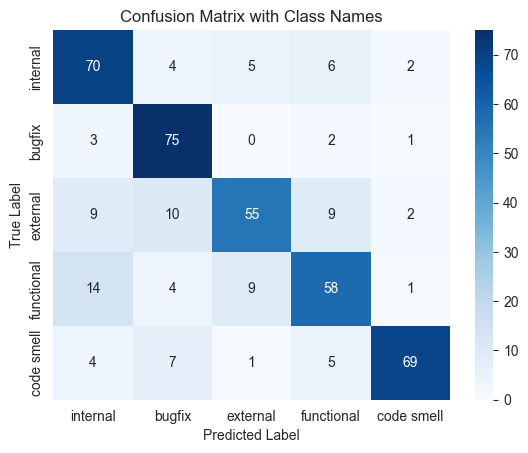

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()
